#### EE23B110.ipynb
Roll No: EE23B110  
Name: Ishaan Seth  
Date: 28 Sept 2024    
Description: Generating a heatmap for a given layout and a given input text, and calculating the total distance travelled by the fingers to type that text.   
Inputs: Keyboard Layout (to be pasted in the cell below), Input text (to be inputted after running the last cell)    
Outputs: Heatmap plot, Key frequency bar, Total distance travelled

# 0: Keyboard Layout

In [1]:
# Please add the required layout here (QWERTY is the default layout)
keys = {
        # Number row
        '`': {'pos': (0, 4), 'start': 'a'},
        '1': {'pos': (1, 4), 'start': 'a'},
        '2': {'pos': (2, 4), 'start': 'a'},
        '3': {'pos': (3, 4), 'start': 's'},
        '4': {'pos': (4, 4), 'start': 'd'},
        '5': {'pos': (5, 4), 'start': 'f'},
        '6': {'pos': (6, 4), 'start': 'j'},
        '7': {'pos': (7, 4), 'start': 'j'},
        '8': {'pos': (8, 4), 'start': 'k'},
        '9': {'pos': (9, 4), 'start': 'l'},
        '0': {'pos': (10, 4), 'start': ';'},
        '-': {'pos': (11, 4), 'start': ';'},
        '=': {'pos': (12, 4), 'start': ';'},

        # Top letter row
        'q': {'pos': (1.5, 3), 'start': 'a'},
        'w': {'pos': (2.5, 3), 'start': 's'},
        'e': {'pos': (3.5, 3), 'start': 'd'},
        'r': {'pos': (4.5, 3), 'start': 'f'},
        't': {'pos': (5.5, 3), 'start': 'f'},
        'y': {'pos': (6.5, 3), 'start': 'j'},
        'u': {'pos': (7.5, 3), 'start': 'j'},
        'i': {'pos': (8.5, 3), 'start': 'k'},
        'o': {'pos': (9.5, 3), 'start': 'l'},
        'p': {'pos': (10.5, 3), 'start': ';'},
        '[': {'pos': (11.5, 3), 'start': ';'},
        ']': {'pos': (12.5, 3), 'start': ';'},
        '\\': {'pos': (13.5, 3), 'start': ';'},

        # Home row
        'a': {'pos': (1.75, 2), 'start': 'a'},
        's': {'pos': (2.75, 2), 'start': 's'},
        'd': {'pos': (3.75, 2), 'start': 'd'},
        'f': {'pos': (4.75, 2), 'start': 'f'},
        'g': {'pos': (5.75, 2), 'start': 'f'},
        'h': {'pos': (6.75, 2), 'start': 'j'},
        'j': {'pos': (7.75, 2), 'start': 'j'},
        'k': {'pos': (8.75, 2), 'start': 'k'},
        'l': {'pos': (9.75, 2), 'start': 'l'},
        ';': {'pos': (10.75, 2), 'start': ';'},
        "'": {'pos': (11.75, 2), 'start': ';'},

        # Bottom letter row
        'z': {'pos': (2.25, 1), 'start': 'a'},
        'x': {'pos': (3.25, 1), 'start': 's'},
        'c': {'pos': (4.25, 1), 'start': 'd'},
        'v': {'pos': (5.25, 1), 'start': 'f'},
        'b': {'pos': (6.25, 1), 'start': 'f'},
        'n': {'pos': (7.25, 1), 'start': 'j'},
        'm': {'pos': (8.25, 1), 'start': 'j'},
        ',': {'pos': (9.25, 1), 'start': 'k'},
        '.': {'pos': (10.25, 1), 'start': 'l'},
        '/': {'pos': (11.25, 1), 'start': ';'},

        # Special keys
        'Shift_L': {'pos': (0, 1), 'start': 'a'},
        'Shift_R': {'pos': (12.5, 1), 'start': ';'},
        'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
        'Alt_L': {'pos': (2, 0), 'start': 'a'},
        'Space': {'pos': (5, 0), 'start': 'f'},
        'Alt_R': {'pos': (8, 0), 'start': 'j'},
        'Ctrl_R': {'pos': (10, 0), 'start': ';'},
    }

characters = {
        # Lowercase letters
        'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
        'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
        'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
        'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
        'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
        'z': ('z',),

        # Uppercase letters
        'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
        'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
        'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
        'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
        'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
        'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
        'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
        'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
        'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),

        # Numbers and their shifted symbols
        '1': ('1',), '!': ('Shift_R', '1'),
        '2': ('2',), '@': ('Shift_R', '2'),
        '3': ('3',), '#': ('Shift_R', '3'),
        '4': ('4',), '$': ('Shift_R', '4'),
        '5': ('5',), '%': ('Shift_R', '5'),
        '6': ('6',), '^': ('Shift_L', '6'),
        '7': ('7',), '&': ('Shift_L', '7'),
        '8': ('8',), '*': ('Shift_L', '8'),
        '9': ('9',), '(': ('Shift_L', '9'),
        '0': ('0',), ')': ('Shift_L', '0'),

        # Other symbols
        '`': ('`',), '~': ('Shift_R', '`'),
        '-': ('-',), '_': ('Shift_L', '-'),
        '=': ('=',), '+': ('Shift_L', '='),
        '[': ('[',), '{': ('Shift_L', '['),
        ']': (']',), '}': ('Shift_L', ']'),
        '\\': ('\\',), '|': ('Shift_L', '\\'),
        ';': (';',), ':': ('Shift_L', ';'),
        "'": ("'",), '"': ('Shift_L', "'"),
        ',': (',',), '<': ('Shift_L', ','),
        '.': ('.',), '>': ('Shift_L', '.'),
        '/': ('/',), '?': ('Shift_L', '/'),

        # Space
        ' ': ('Space',),
    }

# I: Generating the keyboard layout as an image

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def save_keyboard_layout_as_image(keys):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Set the plot limits and hide axes
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 5)
    ax.set_xticks([]) 
    ax.set_yticks([])

    # Iterate through each key and its position
    for key, value in keys.items():
        x, y = value['pos']
        
        # Handle special keys with custom box dimensions
        # The positions and sizes of them have been found out by trial and error. Please enter
        # a layout which does not change the positions of Space, Shift_L & R, and Ctrl_L & R.
        if key == 'Space':
            ax.add_patch(patches.FancyBboxPatch((3.5, 0.25), 4, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(5.5, 0.5, 'Space', fontsize=12, ha='center', va='center')
            
        elif key == 'Shift_L':
            ax.add_patch(patches.FancyBboxPatch((0.25, 1.25), 1.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(1, 1.5, 'Shift_L', fontsize=12, ha='center', va='center')
            
        elif key == 'Shift_R':
            ax.add_patch(patches.FancyBboxPatch((12.25, 1.25), 1.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(13, 1.5, 'Shift_R', fontsize=12, ha='center', va='center')
            
        elif key == 'Ctrl_L':
            ax.text(x + 1, y + 0.5, key, fontsize=12, ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=1.0', facecolor='white', alpha=0.7, edgecolor='black'))
            
        elif key == 'Ctrl_R':
            ax.text(x, y + 0.5, key, fontsize=12, ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=1.0', facecolor='white', alpha=0.7, edgecolor='black'))
            
        else:
            x = int(x)
            y = int(y)

            ax.text(x + 0.5, y + 0.5, key, fontsize=12, ha='center', va='center', 
                    bbox=dict(boxstyle='round,pad=1.0', facecolor='white', alpha=0.7, edgecolor='black'))    
    
    # Set the aspect ratio of the plot to be equal so the keys look proportional
    ax.set_aspect('equal')
    plt.axis('off')
    
    # Render the figure into a canvas
    canvas = FigureCanvas(fig)
    canvas.draw()

    # Convert canvas to NumPy array
    img_array = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    img_array = img_array.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    plt.close(fig)  # Close the figure to free up resources
    
    return img_array

# Save the image to the variable image
image = save_keyboard_layout_as_image(keys)

# II: Cropping the generated layout image

In [3]:
# Crop a given image by the given amount of pixels from each side
def crop_image(img_array, left, right, top, bottom):
    cropped_img = img_array[top:bottom, left:right]
    return cropped_img

# Save the cropped image to variable img
img = crop_image(image, left=125, right=-98, top=112, bottom=-108)

# III: Counting the frequency of each key used

In [4]:
def count_key_usage(input_text, characters):
    key_usage = {}
    
    for char in input_text:
        if char in characters:
            keys = characters[char]
            for key in keys:                
                key_usage[key] = key_usage.get(key, 0) + 1
    
    return key_usage

# IV: Generating heatmap as an overlay on the layout

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def generate_overlay_heatmap(key_usage, keys, img):
    # Initialize a 5x14 matrix (assuming the layout size for a QWERTY type layout)
    heat_data = np.zeros((5, 14))
    
    # Fill the heat_data matrix with the usage frequencies
    for key, usage in key_usage.items():
        if key in keys:
            x, y = keys[key]['pos']
            
            # Handle special keys by spreading their usage over multiple cells
            if key == 'Space':
                # Not counting space for heatmap
                # heat_data[int(y), 3:8] += usage / 5  # Divide usage across 5 columns for the spacebar
                continue
                
            elif key == 'Shift_L':
                heat_data[int(y), 0:2] += usage / 2  # Spread left Shift across 2 cells
                
            elif key == 'Shift_R':
                heat_data[int(y), 12:14] += usage / 2  # Spread right Shift across 2 cells
                
            elif key == 'Tab':
                heat_data[int(y), 0:2] += usage / 2  # Spread Tab across 2 cells
                
            else:
                heat_data[int(y), int(x)] = usage
    
    # Flip the heatmap by flipping the rows
    heat_data = np.flipud(heat_data)
    
    # Define a custom colormap with transparent background (white -> blue -> cyan -> green -> yellow -> red)
    # The first color is transparent (RGBA: (1, 1, 1, 0))
    colors = [(1, 1, 1, 0), (0, 0, 1, 1), (0, 1, 1, 1), (0, 1, 0, 1), (1, 1, 0, 1), (1, 0, 0, 1)]
    cmap_name = 'custom_heatmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
    
    # Create a figure and set the keyboard image as background
    plt.figure(figsize=(10, 5))
    plt.imshow(img, extent=[0, 14, 0, 5])  # Display keyboard image as background
    
    # Overlay the heatmap on the layout
    plt.imshow(heat_data, cmap=cm, interpolation='spline36', alpha=0.55,
               extent=[0, 14, 0, 5], vmin=0, vmax=np.max(heat_data))
    
    # Remove the axes and ticks
    plt.axis('off')
    plt.colorbar(label='Key Usage Frequency')
    
    # Adding labels
    plt.title("Heatmap of Key Usage with Keyboard Background")
    plt.show()

# V: Extracting the home row from the given layout

In [6]:
# Make sure the indices for the home keys match. If they do not, please change the indices here.
def get_home_row(keys):
    # Initialize dictionaries for left and right hands
    home_keys = {'left': {}, 'right': {}}
    finger_mapping = {}

    # Extract home row for the left hand (26th to 29th index in keys)
    left_hand_keys = list(keys.keys())[26:30]
    for i, key in enumerate(left_hand_keys):
        home_keys['left'][key] = key
        finger_mapping[key] = 'left'

    # Extract home row for the right hand (32nd to 35th index in keys)
    right_hand_keys = list(keys.keys())[32:36]
    for i, key in enumerate(right_hand_keys):
        home_keys['right'][key] = key
        finger_mapping[key] = 'right'
    
    return home_keys, finger_mapping

home_keys, finger_mapping = get_home_row(keys)

# VI: Calculating total distance travelled by the fingers

In [7]:
import math

def calculate_finger_travel(input_text, keys, characters):
    total_distance = 0

    for char in input_text:
        key_seq = characters.get(char, [])
        if not key_seq:
            continue
        
        # Determine if Shift is required for this character (uppercase or symbols)
        is_shift_involved = 'Shift_L' in key_seq or 'Shift_R' in key_seq
        shift_key = None

        for key in key_seq:
            if key == 'Shift_L' or key == 'Shift_R':
                continue  # Skip Shift key travel for regular characters
            
            # Get the finger and home key for the current key
            finger_used = keys[key]['start']  # Find which finger is responsible for the key
            hand = finger_mapping.get(finger_used)  # Identify if it's left or right hand -> used to know which Shift will be used
            home_key = home_keys[hand][finger_used]  # Get the home key for that finger
            
            # Determine the appropriate Shift key to use (opposite side)
            if is_shift_involved:
                if hand == 'left':
                    shift_key = 'Shift_R'
                    shift_start_pos = keys[';']['pos']  # Starting from ';' (right pinky)
                else:
                    shift_key = 'Shift_L'
                    shift_start_pos = keys['a']['pos']  # Starting from 'a' (left pinky)
            
            # Calculate distance from home key to the target key
            x1, y1 = keys[home_key]['pos']  # Position of home key
            x2, y2 = keys[key]['pos']  # Position of the target key

            # If Shift is involved, calculate distance to Shift, then to the target key
            if shift_key:
                shift_x, shift_y = keys[shift_key]['pos']
                
                # Calculate the distance from Shift start (either 'a' or ';') to the Shift key
                distance_to_shift = math.sqrt((shift_x - shift_start_pos[0]) ** 2
                                              + (shift_y - shift_start_pos[1]) ** 2)
                
                # Distance from Shift key to the actual character key
                distance_from_shift_to_key = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                
                # Add both distances to the total distance
                total_distance += distance_to_shift + distance_from_shift_to_key
            else:
                # If no Shift is involved, calculate distance directly from home key to target key
                distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                total_distance += distance
    
    return total_distance


# VII: Generate heatmap and total distance for the given text

Enter Input Text:  Ishaan


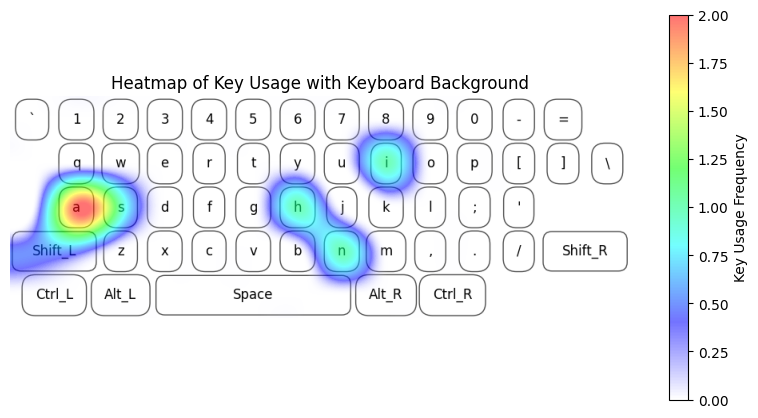

Total Finger Travel Distance: 5.164 units


In [8]:
if __name__ == "__main__":
    input_text = input("Enter Input Text: ")
    
    key_usage = count_key_usage(input_text, characters)
    generate_overlay_heatmap(key_usage, keys, img)
    
    total_distance = calculate_finger_travel(input_text, keys, characters)
    print(f"Total Finger Travel Distance: {total_distance:.3f} units")
